### 11 E1

In [1]:
import numpy as np

p = .35
logodds = np.log(p/(1-p))
logodds

-0.6190392084062235

### 11E2

In [2]:
# log(p/(1-p)) = 3.2
# p/(1-p) = exp(3.2)
# p = exp(3.2) - pexp(3.2)
np.exp(3.2)/(1+np.exp(3.2))

0.9608342772032357

In [3]:
p = .96
logodds = np.log(p/(1-p))
logodds

3.178053830347945

### 11E3

It implies that the log-odds increases by 1.7, or that the odds increase by a factor of np.exp(1.7)

In [1]:
import numpyro
import jax
import scipy.stats
import scipy.special
import scipy
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import jax.numpy as jnp

numpyro.set_host_device_count(4)

In [5]:
a = 1
b = 1.7
x = np.array([0, 1])
p = scipy.special.expit(a+b*x)

def odds(x):
    return x/(1-x)

scipy.special.logit(p[1]) - scipy.special.logit(p[0])

1.6999999999999997

In [6]:
# logodds = a+bx
# log(p/1-p) - log(1/1-p)
odds(p[1])/odds(p[0]), np.exp(1.7)

(5.473947391727198, 5.4739473917272)

### 11E4

OK, no, it's much simpler - if you're at the mean, then you'd have lambda 1, and you might want that to be different

In [7]:
a = 2
b = 3
x = np.hstack([np.zeros(20), np.ones(20)])
λ = np.exp(a + b*x)
data = scipy.stats.poisson(mu=λ).rvs(len(λ))

In [8]:
data

array([  5,   9,   8,   8,  10,   6,   7,   9,   5,   6,   8,   8,   6,
        15,   5,   6,   7,   4,  12,   7, 143, 142, 154, 149, 129, 134,
       138, 154, 159, 138, 146, 158, 122, 162, 170, 148, 179, 163, 140,
       139])

In [9]:
def model(x, y=None):
    b = numpyro.sample(
        'b',
        numpyro.distributions.Normal(loc=0, scale=5)
    )
    λ = jnp.exp(numpyro.deterministic(
        'λ',
        b*x
    )
    )
    numpyro.sample(
        'obs',
        numpyro.distributions.Poisson(rate=λ),
        obs=y,
    )

In [10]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_warmup=1000, num_samples=1000)
mcmc.run(jax.random.PRNGKey(1), x=x, y=data)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 905.11it/s, 3 steps of size 9.17e-01. acc. prob=0.94] 


In [11]:
predictive = numpyro.infer.Predictive(model, posterior_samples=mcmc.get_samples())
preds = predictive(jax.random.PRNGKey(1), x=x)

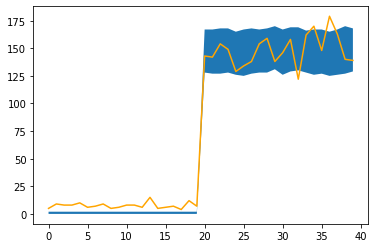

In [12]:
fig, ax = plt.subplots()
ax.plot(np.arange(40), data, c='orange')
hpdi = numpyro.diagnostics.hpdi(preds['obs'])
ax.fill_between(np.arange(40), hpdi[0, :], hpdi[1, :]);

In [13]:
def model(x, y=None):
    a = numpyro.sample(
        'a',
        numpyro.distributions.Normal(loc=0, scale=5)
    )
    b = numpyro.sample(
        'b',
        numpyro.distributions.Normal(loc=0, scale=5)
    )
    λ = jnp.exp(numpyro.deterministic(
        'λ',
        a+b*x
    )
    )
    numpyro.sample(
        'obs',
        numpyro.distributions.Poisson(rate=λ),
        obs=y,
    )

In [14]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_warmup=1000, num_samples=1000)
mcmc.run(jax.random.PRNGKey(1), x=x, y=data)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 834.18it/s, 7 steps of size 1.61e-01. acc. prob=0.92] 


In [15]:
predictive = numpyro.infer.Predictive(model, posterior_samples=mcmc.get_samples())
preds = predictive(jax.random.PRNGKey(1), x=x)

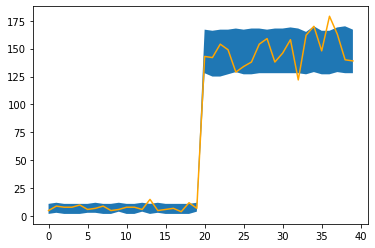

In [16]:
fig, ax = plt.subplots()
ax.plot(np.arange(40), data, c='orange')
hpdi = numpyro.diagnostics.hpdi(preds['obs'])
ax.fill_between(np.arange(40), hpdi[0, :], hpdi[1, :]);

### 11M1

Because in the aggregated case we don't care about the order

In [38]:
data = np.array([1, 0, 0, 1, 0])
disagg = np.exp(np.sum(scipy.stats.bernoulli(p=.3).logpmf(data)))
disagg

0.030869999999999998

In [39]:
agg = np.exp(scipy.stats.binom(n=len(data), p=.3).logpmf(np.sum(data)))
agg

0.3086999999999999

In [40]:
agg / disagg

9.999999999999998

In [43]:
from math import comb

comb(len(data), np.sum(data))

10

### 11M2

log(rate) = a + bx

so log(rate) will increase by 1.7:
log(rate1) - log(rate0) = 1.7
log(rate1/rate0) = 1.7
rate1/rate0 = exp(1.7)

So, the rate will increase by factor of exp(1.7)


### 11M3

cause input is between 0 and 1

### 11M4

cause input is positive

### 11M5

Maybe if rate is between 0 and 1?

### 11M6

Binomial: only two possible events, constant expected value.
Poisson: No upper bound, constant expected number of observed events

## 11M7

In [77]:
import pandas as pd
df = pd.read_csv('chimpanzees.csv', sep=';')
df

,actor,recipient,condition,block,trial,prosoc_left,chose_prosoc,pulled_left
0,1,NaN,0,1,2,0,1,0
1,1,NaN,0,1,4,0,0,1
2,1,NaN,0,1,6,1,0,0
3,1,NaN,0,1,8,0,1,0
4,1,NaN,0,1,10,1,1,1
...,...,...,...,...,...,...,...,...
499,7,4.0,1,6,64,1,1,1
500,7,6.0,1,6,66,1,1,1
501,7,3.0,1,6,68,0,0,1
502,7,7.0,1,6,70,0,0,1


In [82]:
df['treatment'] = 2*df['condition'] + df['prosoc_left']

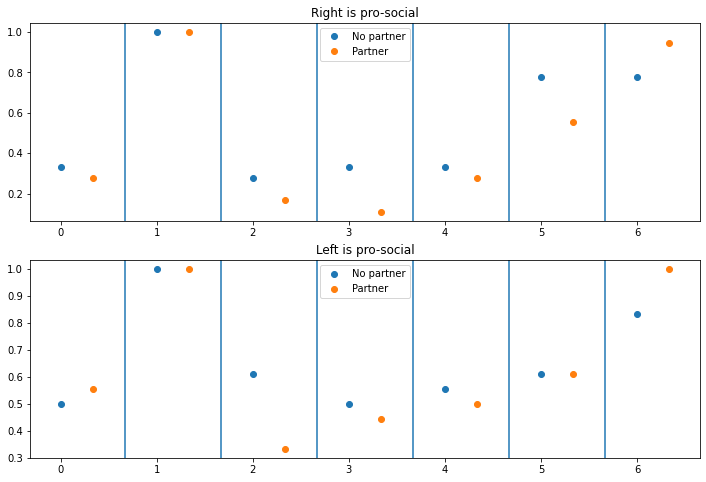

In [88]:
# we're really interested in the change from 0 to 1 and from 2 to 3
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax = ax.flatten()
ax[0].plot(
    np.arange(df['actor'].nunique()),
    df[(df['prosoc_left']==0)&(df['condition']==0)].groupby('actor')['pulled_left'].mean(),
    marker='o',
    linestyle='None',
    label='No partner',
);
ax[0].plot(
    np.arange(df['actor'].nunique())+1/3,
    df[(df['prosoc_left']==0)&(df['condition']==1)].groupby('actor')['pulled_left'].mean(),
    marker='o',
    linestyle='None',
    label='Partner',
);
ax[1].plot(
    np.arange(df['actor'].nunique()),
    df[(df['prosoc_left']==1)&(df['condition']==0)].groupby('actor')['pulled_left'].mean(),
    marker='o',
    linestyle='None',
    label='No partner',
);
ax[1].plot(
    np.arange(df['actor'].nunique())+1/3,
    df[(df['prosoc_left']==1)&(df['condition']==1)].groupby('actor')['pulled_left'].mean(),
    marker='o',
    linestyle='None',
    label='Partner',
);
for i in np.arange(df['actor'].nunique())[1:]-1/3:
    ax[0].axvline(i)
    ax[1].axvline(i)
ax[0].legend()
ax[1].legend();
ax[0].set_title('Right is pro-social')
ax[1].set_title('Left is pro-social');

In [89]:
# ok, so...the data's clear. what are we trying to predict here? the effect of having a partner? cool.

In [90]:
# so, each actor has their own intercept, but then there's a constant effect from having a partner? ok, let's see what happens

In [91]:
def model(treatment, actor, pulled_left):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(loc=0, scale=1.5),
        sample_shape=(len(np.unique(actor)),),
    )
    β = numpyro.sample(
        'β',
        numpyro.distributions.Normal(loc=0, scale=.5),
        sample_shape=(len(np.unique(treatment)),),
    )
    
    p = jax.scipy.special.expit(
        α[actor] + β[treatment],
    )
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Bernoulli(probs=p),
        obs=pulled_left,
    )

In [93]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
mcmc.run(
    jax.random.PRNGKey(1),
    treatment=df['treatment'].to_numpy(),
    actor=df['actor'].to_numpy()-1,
    pulled_left=df['pulled_left'].to_numpy(),
)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 903.35it/s, 7 steps of size 4.52e-01. acc. prob=0.89] 


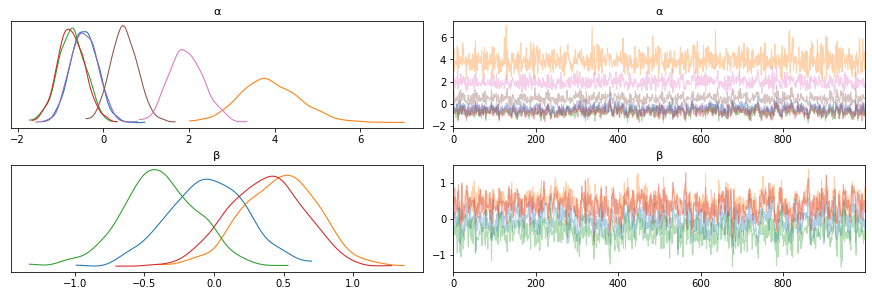

In [94]:
az.plot_trace(az.from_numpyro(mcmc));

In [95]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      α[0]     -0.44      0.32     -0.44     -0.96      0.05    443.22      1.00
      α[1]      3.91      0.74      3.84      2.69      5.04   1000.31      1.00
      α[2]     -0.74      0.32     -0.74     -1.22     -0.17    455.06      1.00
      α[3]     -0.75      0.32     -0.76     -1.22     -0.16    482.32      1.00
      α[4]     -0.45      0.32     -0.45     -0.96      0.08    400.39      1.00
      α[5]      0.49      0.32      0.48     -0.05      1.00    475.20      1.00
      α[6]      1.95      0.41      1.92      1.36      2.69    621.99      1.00
      β[0]     -0.05      0.28     -0.05     -0.52      0.42    373.79      1.00
      β[1]      0.47      0.27      0.48      0.06      0.92    383.86      1.00
      β[2]     -0.39      0.28     -0.40     -0.84      0.04    442.69      1.00
      β[3]      0.37      0.28      0.38     -0.08      0.82    397.41      1.00

Number of divergences: 0


In [96]:
def model(treatment, actor, pulled_left):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(loc=0, scale=10),
        sample_shape=(len(np.unique(actor)),),
    )
    β = numpyro.sample(
        'β',
        numpyro.distributions.Normal(loc=0, scale=.5),
        sample_shape=(len(np.unique(treatment)),),
    )
    
    p = jax.scipy.special.expit(
        α[actor] + β[treatment],
    )
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Bernoulli(probs=p),
        obs=pulled_left,
    )

In [97]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
mcmc.run(
    jax.random.PRNGKey(1),
    treatment=df['treatment'].to_numpy(),
    actor=df['actor'].to_numpy()-1,
    pulled_left=df['pulled_left'].to_numpy(),
)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 926.78it/s, 7 steps of size 3.73e-01. acc. prob=0.85] 


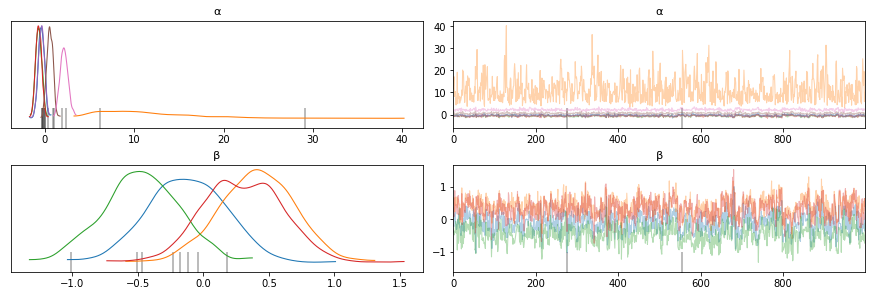

In [98]:
az.plot_trace(az.from_numpyro(mcmc));

In [99]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      α[0]     -0.38      0.34     -0.38     -0.87      0.19    305.35      1.00
      α[1]     11.21      5.27     10.13      3.87     19.19    423.40      1.00
      α[2]     -0.68      0.34     -0.69     -1.24     -0.15    280.03      1.00
      α[3]     -0.69      0.33     -0.70     -1.20     -0.12    345.99      1.00
      α[4]     -0.39      0.34     -0.38     -0.93      0.16    279.64      1.00
      α[5]      0.58      0.34      0.57      0.05      1.14    335.42      1.00
      α[6]      2.16      0.45      2.14      1.38      2.81    351.39      1.00
      β[0]     -0.13      0.29     -0.13     -0.58      0.38    262.26      1.00
      β[1]      0.41      0.28      0.41     -0.05      0.89    245.54      1.00
      β[2]     -0.48      0.29     -0.47     -0.95      0.01    279.98      1.00
      β[3]      0.30      0.30      0.29     -0.17      0.79    309.13      1.00

Number of divergences: 2


Ah, interesting - so, the second actor just grows and...is that where the divergences are? How to tell?

### 11 M8

In [6]:
import pandas as pd
df = pd.read_csv('kline.csv', sep=';')

In [7]:
df

,culture,population,contact,total_tools,mean_TU
0,Malekula,1100,low,13,3.2
1,Tikopia,1500,low,22,4.7
2,Santa Cruz,3600,low,24,4.0
3,Yap,4791,high,43,5.0
4,Lau Fiji,7400,high,33,5.0
5,Trobriand,8000,high,19,4.0
6,Chuuk,9200,high,40,3.8
7,Manus,13000,low,28,6.6
8,Tonga,17500,high,55,5.4
9,Hawaii,275000,low,71,6.6


In [19]:
cid = (df['contact']=='high').astype(int).to_numpy()
cid

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [13]:
def m119(T):
    λ = numpyro.sample(
        'λ',
        numpyro.distributions.Normal(3, .5),
    )
    
    numpyro.sample(
        'T',
        numpyro.distributions.Poisson(jnp.exp(λ)),
        obs=T,
    )

In [14]:
sampler = numpyro.infer.NUTS(m119)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
mcmc.run(jax.random.PRNGKey(1), T=df['total_tools'].to_numpy())
mcmc.print_summary()

sample: 100%|██████████| 2000/2000 [00:01<00:00, 1277.40it/s, 3 steps of size 8.64e-01. acc. prob=0.94]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         λ      3.54      0.05      3.54      3.46      3.63    340.14      1.00

Number of divergences: 0


In [15]:
# without hawaii
sampler = numpyro.infer.NUTS(m119)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
mcmc.run(jax.random.PRNGKey(1), T=df[df['culture']!='Hawaii']['total_tools'].to_numpy())
mcmc.print_summary()

sample: 100%|██████████| 2000/2000 [00:01<00:00, 1237.04it/s, 3 steps of size 9.24e-01. acc. prob=0.94]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         λ      3.42      0.05      3.42      3.32      3.50    345.60      1.00

Number of divergences: 0


In [16]:
# ok, so in this case, it really changes the estimate of lambda

In [34]:
def m1110(T, P, cid):
    n_cid = len(np.unique(cid))
    with numpyro.plate('cid', n_cid):
        a = numpyro.sample(
            'a',
            numpyro.distributions.Normal(3, .5),
        )
        b = numpyro.sample(
            'b',
            numpyro.distributions.Normal(0, .2),
        )
    
    λ = numpyro.deterministic(
        'λ',
        a[cid] + b[cid]*P
    )
    
    numpyro.sample(
        'T',
        numpyro.distributions.Poisson(jnp.exp(λ)),
        obs=T,
    )

In [43]:
sampler = numpyro.infer.NUTS(m1110)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
P = df['population'].to_numpy()
P_mean = np.mean(P)
P_std = np.std(P)
P = (P - P_mean)/P_std
cid = (df['contact']=='high').astype(int).to_numpy()
mcmc.run(jax.random.PRNGKey(1), T=df['total_tools'].to_numpy(), P=P, cid=cid)
mcmc.print_summary()

sample: 100%|██████████| 2000/2000 [00:01<00:00, 1101.03it/s, 3 steps of size 5.91e-01. acc. prob=0.89]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      a[0]      3.22      0.10      3.22      3.06      3.37    719.89      1.00
      a[1]      3.63      0.09      3.63      3.49      3.79    805.50      1.00
      b[0]      0.34      0.05      0.34      0.26      0.41    681.97      1.00
      b[1]      0.04      0.20      0.04     -0.28      0.38    736.10      1.00

Number of divergences: 0


In [44]:
sampler = numpyro.infer.NUTS(m1110)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
idx = df[df['culture'] != 'Hawaii'].index
mcmc.run(jax.random.PRNGKey(1), T=df.loc[idx]['total_tools'].to_numpy(), P=P[idx], cid=cid[idx])
mcmc.print_summary()

sample: 100%|██████████| 2000/2000 [00:01<00:00, 1117.03it/s, 7 steps of size 5.31e-01. acc. prob=0.92]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      a[0]      3.07      0.13      3.07      2.88      3.29    786.93      1.00
      a[1]      3.63      0.10      3.63      3.49      3.80    780.49      1.00
      b[0]      0.03      0.21      0.03     -0.31      0.34    808.65      1.00
      b[1]      0.04      0.19      0.04     -0.32      0.31    746.22      1.00

Number of divergences: 0


In [37]:
# OK, now this looks right - for the group 0 (which Hawaii was from), it changes

## 11 H1

In [1]:
import pandas as pd
df = pd.read_csv('chimpanzees.csv', sep=';')
df

,actor,recipient,condition,block,trial,prosoc_left,chose_prosoc,pulled_left
0,1,NaN,0,1,2,0,1,0
1,1,NaN,0,1,4,0,0,1
2,1,NaN,0,1,6,1,0,0
3,1,NaN,0,1,8,0,1,0
4,1,NaN,0,1,10,1,1,1
...,...,...,...,...,...,...,...,...
499,7,4.0,1,6,64,1,1,1
500,7,6.0,1,6,66,1,1,1
501,7,3.0,1,6,68,0,0,1
502,7,7.0,1,6,70,0,0,1


In [2]:
df['treatment'] = 2*df['condition'] + df['prosoc_left']

In [3]:
# ok, so...the data's clear. what are we trying to predict here? the effect of having a partner? cool.

In [4]:
# so, each actor has their own intercept, but then there's a constant effect from having a partner? ok, let's see what happens

In [5]:
def model(treatment, actor, pulled_left):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(loc=0, scale=1.5),
        sample_shape=(len(np.unique(actor)),),
    )
    β = numpyro.sample(
        'β',
        numpyro.distributions.Normal(loc=0, scale=.5),
        sample_shape=(len(np.unique(treatment)),),
    )
    
    p = jax.scipy.special.expit(
        α[actor] + β[treatment],
    )
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Bernoulli(probs=p),
        obs=pulled_left,
    )

In [8]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
mcmc.run(
    jax.random.PRNGKey(1),
    treatment=df['treatment'].to_numpy(),
    actor=df['actor'].to_numpy()-1,
    pulled_left=df['pulled_left'].to_numpy(),
)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 960.79it/s, 7 steps of size 4.52e-01. acc. prob=0.89]  


In [9]:
az.waic(az.from_numpyro(mcmc))

Computed from 1000 by 504 log-likelihood matrix

          Estimate       SE
elpd_waic  -265.47     9.43
p_waic        7.86        -

In [10]:
def m113(treatment, actor, pulled_left):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(loc=0, scale=1.5),
    )
    β = numpyro.sample(
        'β',
        numpyro.distributions.Normal(loc=0, scale=.5),
        sample_shape=(len(np.unique(treatment)),),
    )
    
    p = jax.scipy.special.expit(
        α + β[treatment],
    )
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Bernoulli(probs=p),
        obs=pulled_left,
    )

In [11]:
sampler = numpyro.infer.NUTS(m113)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
mcmc.run(
    jax.random.PRNGKey(1),
    treatment=df['treatment'].to_numpy(),
    actor=df['actor'].to_numpy()-1,
    pulled_left=df['pulled_left'].to_numpy(),
)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 982.82it/s, 7 steps of size 3.15e-01. acc. prob=0.93]  


In [12]:
az.waic(az.from_numpyro(mcmc))

Computed from 1000 by 504 log-likelihood matrix

          Estimate       SE
elpd_waic  -341.28     4.57
p_waic        3.68        -

In [13]:
# OK, so the one with varying actors has better predictive accuracy (lower elpd_waic)

## 11 H2

In [2]:
import pandas as pd
df = pd.read_csv('eagles.csv')
df

,y,n,P,A,V
0,17,24,L,A,L
1,29,29,L,A,S
2,17,27,L,I,L
3,20,20,L,I,S
4,1,12,S,A,L
5,15,16,S,A,S
6,0,28,S,I,L
7,1,4,S,I,S



y

    Number of successful attempts.
n

    Total number of attempts.
P

    Size of pirating eagle (L = large, S = small).
A

    Age of pirating eagle (I = immature, A = adult).
V

    Size of victim eagle (L = large, S = small).

In [3]:
def model(y, n, P, A, V):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(0, 1.5),
    )
    β_P = numpyro.sample(
        'β_P',
        numpyro.distributions.Normal(0, 0.5),
        sample_shape=(2,),
    )
    β_V = numpyro.sample(
        'β_V',
        numpyro.distributions.Normal(0, 0.5),
        sample_shape=(2,),
    )
    β_A = numpyro.sample(
        'β_A',
        numpyro.distributions.Normal(0, 0.5),
        sample_shape=(2,),
    )
    
    p = numpyro.deterministic('p', jax.scipy.special.expit(α + β_P[P] + β_V[V] + β_A[A]))
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Binomial(total_count=n, probs=p),
        obs=y,
    )

In [4]:
prior_pred = numpyro.infer.Predictive(model, num_samples=100)
prior_samples = prior_pred(
    jax.random.PRNGKey(0),
    n=df['n'].to_numpy(),
    P=(df['P']=='L').astype(int).to_numpy(),
    A=(df['A']=='A').astype(int).to_numpy(),
    V=(df['V']=='L').astype(int).to_numpy(),
    y=None,
)

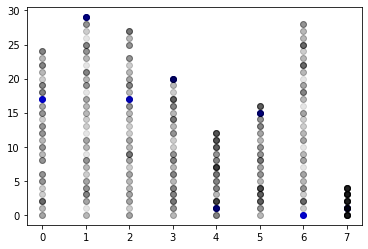

In [5]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['y'].to_numpy(), 'o', color='blue');
ax.plot(np.arange(len(df)), prior_samples['obs'].T, 'o', alpha=.1, color='black');

In [8]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000, num_chains=4)
mcmc.run(
    jax.random.PRNGKey(0),
    n=df['n'].to_numpy(),
    P=(df['P']=='L').astype(int).to_numpy(),
    A=(df['A']=='A').astype(int).to_numpy(),
    V=(df['V']=='L').astype(int).to_numpy(),
    y=df['y'].to_numpy(),
)
mcmc.print_summary()

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         α      0.59      0.61      0.58     -0.39      1.59   1835.61      1.00
    β_A[0]     -0.37      0.40     -0.38     -0.98      0.31   2355.07      1.00
    β_A[1]      0.41      0.39      0.41     -0.23      1.03   3007.90      1.00
    β_P[0]     -1.03      0.40     -1.04     -1.64     -0.34   2854.88      1.00
    β_P[1]      1.09      0.40      1.10      0.48      1.79   2623.95      1.00
    β_V[0]      1.15      0.40      1.15      0.50      1.83   3185.57      1.00
    β_V[1]     -1.08      0.40     -1.08     -1.75     -0.45   3100.34      1.00

Number of divergences: 0


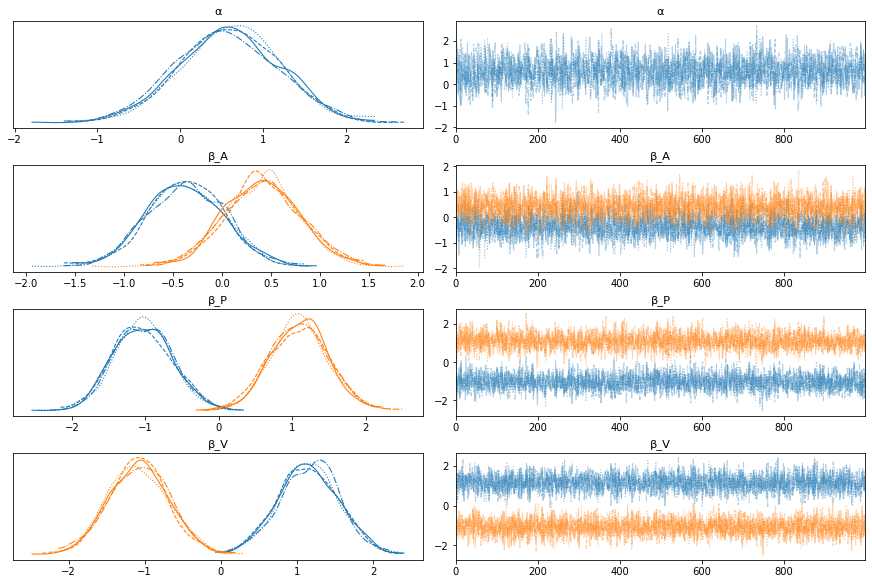

In [9]:
az.plot_trace(az.from_numpyro(mcmc), var_names=['~p']);

In [10]:
# OK, so - if the victim is large, it's harder to catch it. If the pirate is an adult, it catches more. If the pirate is large, it catches more.

In [11]:
az.waic(az.from_numpyro(mcmc))

/home/marco/numpyro-dev/venv/lib/python3.8/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 by 8 log-likelihood matrix

          Estimate       SE
elpd_waic   -22.96     3.56
p_waic        6.50        -

There has been a warning during the calculation. Please check the results.

In [12]:
post_pred = numpyro.infer.Predictive(model, posterior_samples=mcmc.get_samples())
predictions = post_pred(
    jax.random.PRNGKey(0),
    n=df['n'].to_numpy(),
    P=(df['P']=='L').astype(int).to_numpy(),
    A=(df['A']=='A').astype(int).to_numpy(),
    V=(df['V']=='L').astype(int).to_numpy(),
    y=None,
)

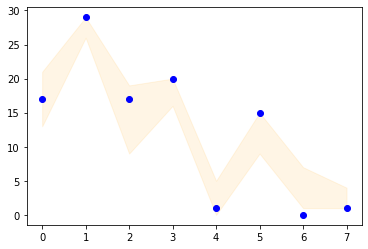

In [13]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['y'].to_numpy(), 'o', color='blue');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(predictions['obs']), color='orange', alpha=.1);

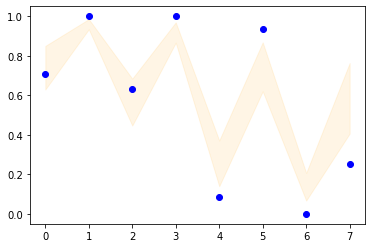

In [14]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['y'].to_numpy()/df['n'].to_numpy(), 'o', color='blue');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(mcmc.get_samples()['p']), color='orange', alpha=.1);

In [15]:
def model(y, n, PA, V):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(0, 1.5),
    )
    β_V = numpyro.sample(
        'β_V',
        numpyro.distributions.Normal(0, 0.5),
        sample_shape=(2,),
    )
    β_PA = numpyro.sample(
        'β_PA',
        numpyro.distributions.Normal(0, 0.5),
        sample_shape=(4,),
    )
    
    p = numpyro.deterministic('p', jax.scipy.special.expit(α + β_V[V] + β_PA[PA]))
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Binomial(total_count=n, probs=p),
        obs=y,
    )

In [16]:
prior_pred = numpyro.infer.Predictive(model, num_samples=100)
prior_samples = prior_pred(
    jax.random.PRNGKey(0),
    n=df['n'].to_numpy(),
    PA=(df['P']=='L').astype(int).to_numpy() + 2*(df['A']=='A').astype(int).to_numpy(),
    # so, we've got:
    # 0: small pirate, not adult
    # 1: large pirate, not adult
    # 2: small pirate, adult
    # 3: large pirate, adult
    V=(df['V']=='L').astype(int).to_numpy(),
    y=None,
)

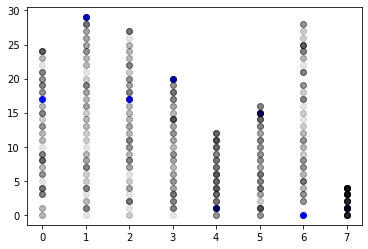

In [17]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['y'].to_numpy(), 'o', color='blue');
ax.plot(np.arange(len(df)), prior_samples['obs'].T, 'o', alpha=.1, color='black');

In [25]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000, num_chains=4)
mcmc.run(
    jax.random.PRNGKey(0),
    n=df['n'].to_numpy(),
    PA=(df['P']=='L').astype(int).to_numpy() + 2*(df['A']=='A').astype(int).to_numpy(),
    V=(df['V']=='L').astype(int).to_numpy(),
    y=df['y'].to_numpy(),
)
mcmc.print_summary()

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         α      0.64      0.46      0.64     -0.09      1.45   1989.07      1.00
   β_PA[0]     -1.38      0.38     -1.37     -1.97     -0.73   3393.88      1.00
   β_PA[1]      0.72      0.35      0.73      0.15      1.31   2648.36      1.00
   β_PA[2]     -0.27      0.38     -0.26     -0.86      0.37   3103.56      1.00
   β_PA[3]      0.95      0.37      0.95      0.36      1.57   2860.66      1.00
    β_V[0]      1.10      0.40      1.10      0.48      1.81   2588.99      1.00
    β_V[1]     -1.04      0.39     -1.04     -1.66     -0.35   2547.06      1.00

Number of divergences: 0


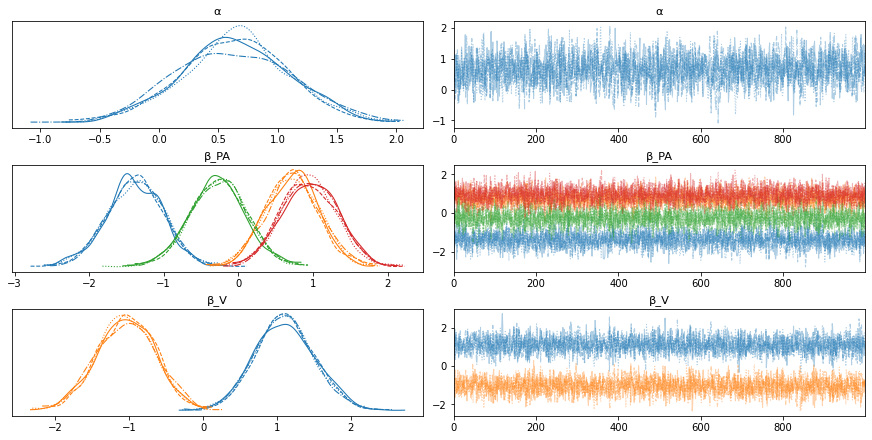

In [26]:
az.plot_trace(az.from_numpyro(mcmc), var_names=['~p']);

In [28]:
az.waic(az.from_numpyro(mcmc))

/home/marco/numpyro-dev/venv/lib/python3.8/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 by 8 log-likelihood matrix

          Estimate       SE
elpd_waic   -25.58     3.87
p_waic        7.83        -

There has been a warning during the calculation. Please check the results.

In [29]:
post_pred = numpyro.infer.Predictive(model, posterior_samples=mcmc.get_samples())
predictions = post_pred(
    jax.random.PRNGKey(0),
    n=df['n'].to_numpy(),
    PA=(df['P']=='L').astype(int).to_numpy() + 2*(df['A']=='A').astype(int).to_numpy(),
    V=(df['V']=='L').astype(int).to_numpy(),
    y=None,
)

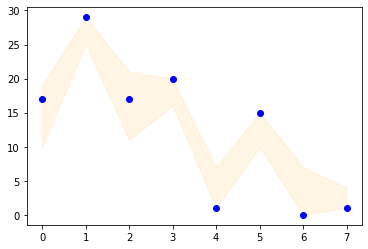

In [30]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['y'].to_numpy(), 'o', color='blue');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(predictions['obs']), color='orange', alpha=.1);

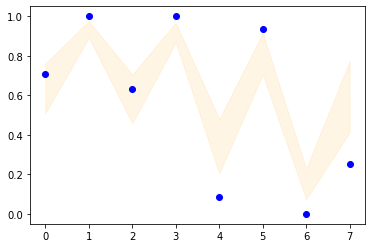

In [31]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['y'].to_numpy()/df['n'].to_numpy(), 'o', color='blue');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(mcmc.get_samples()['p']), color='orange', alpha=.1);

In [75]:
# hmmm, doesn't look like this helps, really

## 11H3

In [78]:
df = pd.read_csv('salamanders.csv', sep=';')
df.head()

,SITE,SALAMAN,PCTCOVER,FORESTAGE
0,1,13,85,316
1,2,11,86,88
2,3,11,90,548
3,4,9,88,64
4,5,8,89,43


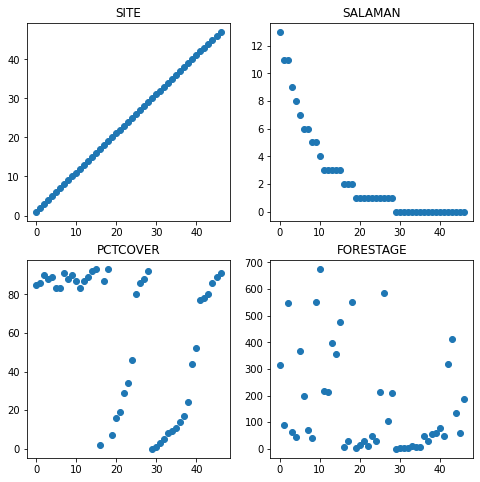

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = ax.flatten()
for n, col in enumerate(df):
    ax[n].plot(np.arange(len(df)), df[col], 'o')
    ax[n].set_title(col)

In [115]:
def scale(feat):
    return (feat - np.mean(feat))/np.std(feat)

In [145]:
def model(salaman, pctcover, forestage):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(0, 2),
    )
    β = numpyro.sample(
        'β',
        numpyro.distributions.Normal(0, 1),
    )
    
    λ = jnp.exp(α + β*pctcover)
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Poisson(rate=λ),
        obs=salaman,
    )

In [146]:
prior_pred = numpyro.infer.Predictive(model, num_samples=100)
prior_samples = prior_pred(
    jax.random.PRNGKey(0),
    salaman=None,
    pctcover=scale(df['PCTCOVER'].to_numpy()),
    forestage=None,
)

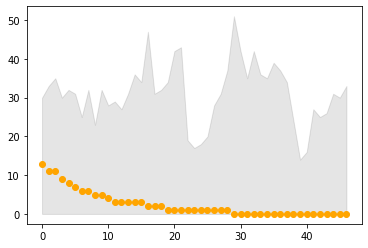

In [147]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['SALAMAN'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(prior_samples['obs']), color='black', alpha=.1);

In [149]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
mcmc.run(
    jax.random.PRNGKey(0),
    salaman=df['SALAMAN'].to_numpy(),
    pctcover=scale(df['PCTCOVER'].to_numpy()),
    forestage=None,
)

sample: 100%|██████████| 2000/2000 [00:01<00:00, 1077.21it/s, 7 steps of size 4.88e-01. acc. prob=0.93]


In [150]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         α      0.42      0.15      0.43      0.20      0.68    412.27      1.01
         β      1.15      0.18      1.13      0.87      1.42    444.33      1.00

Number of divergences: 0


In [151]:
post_pred = numpyro.infer.Predictive(model, posterior_samples=mcmc.get_samples())
predictions = post_pred(
    jax.random.PRNGKey(0),
    salaman=None,
    pctcover=scale(df['PCTCOVER'].to_numpy()),
    forestage=None,
)

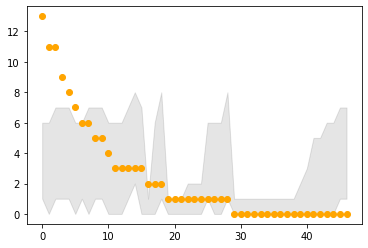

In [152]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['SALAMAN'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(predictions['obs']), color='black', alpha=.1);

In [153]:
# model does a terrible job for higher counts in the first few sites

In [154]:
def model(salaman, pctcover, forestage):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(0, 2),
    )
    β_p = numpyro.sample(
        'β_p',
        numpyro.distributions.Normal(0, 1),
    )
    β_f = numpyro.sample(
        'β_f',
        numpyro.distributions.Normal(0, 1),
    )
    
    λ = jnp.exp(α + β_p*pctcover + β_f*forestage)
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Poisson(rate=λ),
        obs=salaman,
    )

In [156]:
prior_pred = numpyro.infer.Predictive(model, num_samples=100)
prior_samples = prior_pred(
    jax.random.PRNGKey(0),
    salaman=None,
    pctcover=scale(df['PCTCOVER'].to_numpy()),
    forestage=scale(df['FORESTAGE'].to_numpy()),
)

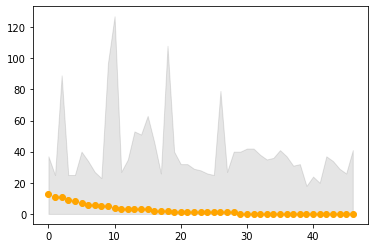

In [157]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['SALAMAN'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(prior_samples['obs']), color='black', alpha=.1);

In [159]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
mcmc.run(
    jax.random.PRNGKey(0),
    salaman=df['SALAMAN'].to_numpy(),
    pctcover=scale(df['PCTCOVER'].to_numpy()),
    forestage=scale(df['FORESTAGE'].to_numpy()),
)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 928.21it/s, 7 steps of size 3.94e-01. acc. prob=0.93] 


In [160]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         α      0.42      0.15      0.43      0.18      0.67    555.52      1.01
       β_f      0.01      0.09      0.00     -0.16      0.15    521.17      1.00
       β_p      1.13      0.19      1.13      0.80      1.43    465.69      1.01

Number of divergences: 0


In [162]:
post_pred = numpyro.infer.Predictive(model, posterior_samples=mcmc.get_samples())
predictions = post_pred(
    jax.random.PRNGKey(0),
    salaman=None,
    pctcover=scale(df['PCTCOVER'].to_numpy()),
    forestage=scale(df['FORESTAGE'].to_numpy()),
)

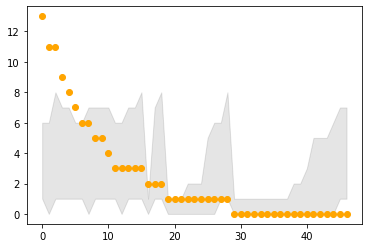

In [163]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['SALAMAN'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(predictions['obs']), color='black', alpha=.1);

In [181]:
def model(salaman, pctcover, forestage, site_id):
    α_μ = numpyro.sample(
        'α_μ',
        numpyro.distributions.Normal(0, 2),
    )
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(α_μ, 2),
        sample_shape=(len(np.unique(site_id)),)
    )
    β_p = numpyro.sample(
        'β_p',
        numpyro.distributions.Normal(0, 2),
    )
    β_f = numpyro.sample(
        'β_f',
        numpyro.distributions.Normal(0, 2),
    )
    
    λ = jnp.exp(α[site_id] + β_p*pctcover + β_f*forestage)
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Poisson(rate=λ),
        obs=salaman,
    )

In [182]:
prior_pred = numpyro.infer.Predictive(model, num_samples=100)
prior_samples = prior_pred(
    jax.random.PRNGKey(0),
    salaman=None,
    pctcover=scale(df['PCTCOVER'].to_numpy()),
    forestage=scale(df['FORESTAGE'].to_numpy()),
    site_id=df.index.to_numpy(),
)

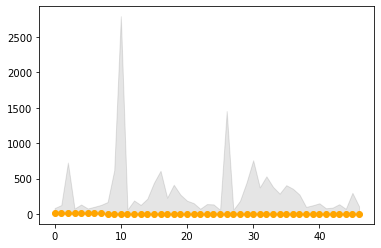

In [183]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['SALAMAN'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(prior_samples['obs']), color='black', alpha=.1);

In [184]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000)
mcmc.run(
    jax.random.PRNGKey(0),
    salaman=df['SALAMAN'].to_numpy(),
    pctcover=scale(df['PCTCOVER'].to_numpy()),
    forestage=scale(df['FORESTAGE'].to_numpy()),
    site_id=df.index.to_numpy(),
)

sample: 100%|██████████| 2000/2000 [00:02<00:00, 767.65it/s, 31 steps of size 1.46e-01. acc. prob=0.94]


In [185]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      α[0]      1.53      0.41      1.54      0.82      2.14    464.35      1.01
      α[1]      1.46      0.54      1.48      0.56      2.30    375.71      1.00
      α[2]      1.06      0.71      1.06     -0.02      2.28    417.34      1.00
      α[3]      1.17      0.62      1.17      0.21      2.22    369.65      1.00
      α[4]      1.03      0.67      1.05     -0.10      2.07    367.97      1.00
      α[5]      0.90      0.52      0.91      0.09      1.81    515.22      1.00
      α[6]      0.85      0.50      0.86      0.07      1.67    619.76      1.00
      α[7]      0.66      0.70      0.67     -0.49      1.76    406.32      1.00
      α[8]      0.54      0.70      0.56     -0.64      1.64    460.50      1.00
      α[9]      0.22      0.79      0.21     -1.07      1.48    363.26      1.00
     α[10]      0.01      0.97     -0.01     -1.42      1.75    379.83      1.00
     α[11]      0.06      0

In [186]:
post_pred = numpyro.infer.Predictive(model, posterior_samples=mcmc.get_samples())
predictions = post_pred(
    jax.random.PRNGKey(0),
    salaman=None,
    pctcover=scale(df['PCTCOVER'].to_numpy()),
    forestage=scale(df['FORESTAGE'].to_numpy()),
    site_id=df.index.to_numpy(),
)

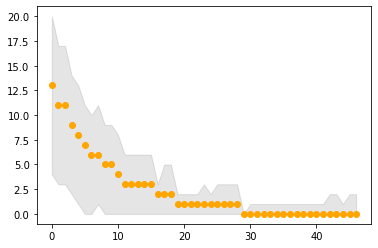

In [187]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['SALAMAN'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(predictions['obs']), color='black', alpha=.1);

In [188]:
# OK, once we have varying intercepts, then the betas are found to be somewhat helpful

## 11H4

In [5]:
import pandas as pd
df = pd.read_csv('NWOGrants.csv', sep=';')

In [6]:
df

# first, let's do gender -> awards
# second, let's do gender, discipline -> awards
# if this is indeed a pipe, then...in the second case, the effect of gender should disappear
# shouldn't be too hard.

,discipline,gender,applications,awards
0,Chemical sciences,m,83,22
1,Chemical sciences,f,39,10
2,Physical sciences,m,135,26
3,Physical sciences,f,39,9
4,Physics,m,67,18
5,Physics,f,9,2
6,Humanities,m,230,33
7,Humanities,f,166,32
8,Technical sciences,m,189,30
9,Technical sciences,f,62,13


In [56]:
def model(discipline, gender, applications, awards):
    α_gender = numpyro.sample(
        'α_gender',
        numpyro.distributions.Normal(0, 1),
        sample_shape=(2,),  # just 2 genders in this dataset
    )
    
    p = numpyro.deterministic('p', jax.scipy.special.expit(α_gender[gender]))
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Binomial(total_count=applications, probs=p),
        obs=awards,
    )

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(df['gender'])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [58]:
prior_pred = numpyro.infer.Predictive(model, num_samples=100)
prior_samples = prior_pred(
    jax.random.PRNGKey(0),
    discipline=le.fit_transform(df['discipline']),
    gender=le.fit_transform(df['gender']),
    applications=df['applications'].to_numpy(),
    awards=None,
)

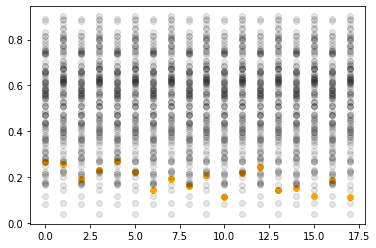

In [59]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['awards']/df['applications'], 'o', color='orange');
# ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(prior_samples['p']), color='black', alpha=.1);
ax.plot(np.arange(len(df)), prior_samples['p'].T, 'o', color='black', alpha=.1);

In [60]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(
    sampler,
    num_warmup=1000,
    num_chains=4,
    num_samples=1000,
)
mcmc.run(
    jax.random.PRNGKey(0),
    discipline=le.fit_transform(df['discipline']),
    gender=le.fit_transform(df['gender']),
    applications=df['applications'].to_numpy(),
    awards=df['awards'].to_numpy(),
)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [61]:
mcmc.print_summary()  # so, these are female, male. So, overall, females get fewer awards.


                 mean       std    median      5.0%     95.0%     n_eff     r_hat
α_gender[0]     -1.73      0.08     -1.73     -1.87     -1.60   3932.51      1.00
α_gender[1]     -1.53      0.06     -1.53     -1.64     -1.43   2900.57      1.00

Number of divergences: 0


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>],
       [<AxesSubplot:title={'center':'α_gender'}>,
        <AxesSubplot:title={'center':'α_gender'}>]], dtype=object)

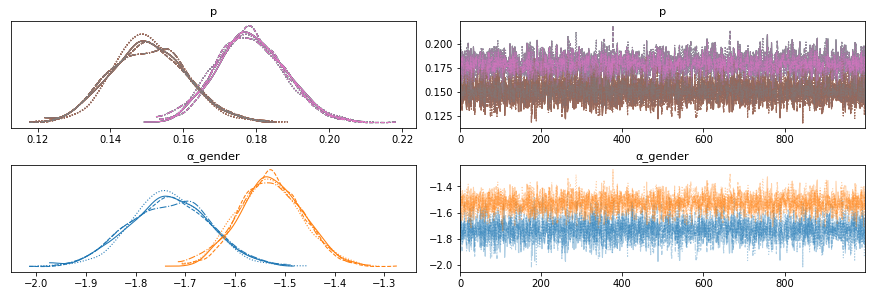

In [62]:
az.plot_trace(az.from_numpyro(mcmc))

In [44]:
def model(discipline, gender, applications, awards):
    α_gender = numpyro.sample(
        'α_gender',
        numpyro.distributions.Normal(0, 1),
        sample_shape=(2,),  # just 2 genders in this dataset
    )
    α_discipline = numpyro.sample(
        'α_discipline',
        numpyro.distributions.Normal(0, 1),
        sample_shape=(len(np.unique(discipline)),),  # just 2 genders in this dataset
    )
    
    p = numpyro.deterministic('p', jax.scipy.special.expit(α_gender[gender] + α_discipline[discipline]))
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Binomial(total_count=applications, probs=p),
        obs=awards,
    )

In [45]:
# women have lower rates of awards.

# now, let's condition on discipline too

In [46]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(
    sampler,
    num_warmup=1000,
    num_chains=4,
    num_samples=1000,
)
mcmc.run(
    jax.random.PRNGKey(0),
    discipline=le.fit_transform(df['discipline']),
    gender=le.fit_transform(df['gender']),
    applications=df['applications'].to_numpy(),
    awards=df['awards'].to_numpy(),
)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [47]:
mcmc.print_summary()  # so now, females still get fewer awards. But both have shrunk, which is consistent with the hypothesis that gender influences discipline.
# but, more crucially, the difference is no longer so clear cut


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
α_discipline[0]      0.16      0.36      0.17     -0.47      0.70    703.35      1.01
α_discipline[1]     -0.16      0.34     -0.16     -0.69      0.39    625.79      1.01
α_discipline[2]     -0.40      0.33     -0.41     -0.96      0.10    624.21      1.01
α_discipline[3]     -0.43      0.36     -0.43     -1.03      0.13    674.93      1.00
α_discipline[4]     -0.51      0.33     -0.50     -1.06      0.02    593.87      1.01
α_discipline[5]     -0.18      0.36     -0.18     -0.76      0.39    648.80      1.01
α_discipline[6]      0.13      0.38      0.14     -0.51      0.75    782.33      1.00
α_discipline[7]     -0.62      0.32     -0.63     -1.18     -0.12    581.71      1.01
α_discipline[8]     -0.37      0.34     -0.37     -0.94      0.17    634.55      1.00
    α_gender[0]     -1.31      0.32     -1.31     -1.78     -0.74    569.31      1.01
    α_gender[1]     -1.17      0.31     -1.18     -1.

array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>],
       [<AxesSubplot:title={'center':'α_discipline'}>,
        <AxesSubplot:title={'center':'α_discipline'}>],
       [<AxesSubplot:title={'center':'α_gender'}>,
        <AxesSubplot:title={'center':'α_gender'}>]], dtype=object)

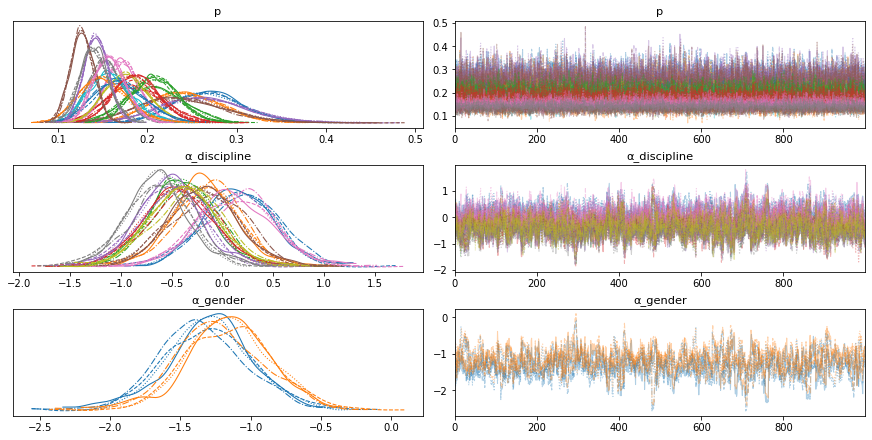

In [48]:
az.plot_trace(az.from_numpyro(mcmc))

In [49]:
# so, an effective intervention - make sure women are admitted to certain disciplines more?

## 11 H5

In [98]:
g = scipy.stats.bernoulli(p=.5).rvs(size=100)
u = scipy.stats.norm(0, 1).rvs(size=100)
d = scipy.stats.binom(n=5, p=scipy.special.expit(g+u)).rvs(size=100)
a = scipy.stats.norm(g+d+u, 1).rvs(size=100)

In [102]:
p = .6
logit_p = scipy.special.logit(p)
logit_p

0.4054651081081642

In [87]:
# model without discipline

In [105]:
def model(g, a):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(0, 5),
    )
    β_g = numpyro.sample(
        'β_g',
        numpyro.distributions.Normal(0, 5),
        sample_shape=(2,),
    )
    σ = numpyro.sample(
        'σ',
        numpyro.distributions.Normal(0, 5),
    )
    
    μ = α + β_g[g]
    
    a = numpyro.sample(
        'a',
        numpyro.distributions.Normal(μ, σ),
        obs=a,
    )

In [106]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000, num_chains=4)
mcmc.run(jax.random.PRNGKey(0), g=g, a=a)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [107]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         α      2.32      2.93      2.24     -2.47      7.06    716.56      1.00
    β_g[0]     -0.08      2.95      0.01     -5.29      4.30    727.65      1.00
    β_g[1]      1.85      2.94      1.95     -2.86      6.60    705.73      1.00
         σ      2.86      0.21      2.85      2.54      3.21   1293.39      1.00

Number of divergences: 0


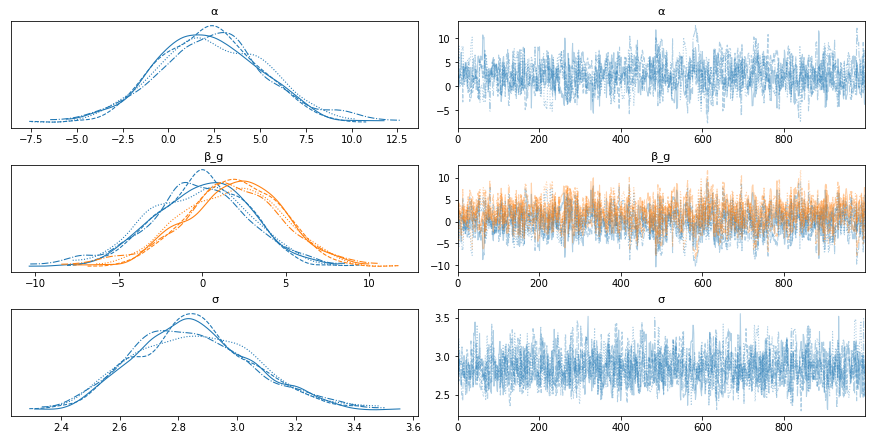

In [108]:
az.plot_trace(az.from_numpyro(mcmc));

In [109]:
# with discipline

In [114]:
def model(g, d, a):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(0, 5),
    )
    β_g = numpyro.sample(
        'β_g',
        numpyro.distributions.Normal(0, 5),
        sample_shape=(2,),
    )
    β_d = numpyro.sample(
        'β_d',
        numpyro.distributions.Normal(0, 5),
        sample_shape=(len(np.unique(d)),)
    )
    σ = numpyro.sample(
        'σ',
        numpyro.distributions.Normal(0, 5),
    )
    
    μ = α + β_g[g] + β_d[d]
    
    a = numpyro.sample(
        'a',
        numpyro.distributions.Normal(μ, σ),
        obs=a,
    )

In [115]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000, num_chains=4)
mcmc.run(jax.random.PRNGKey(0), g=g, d=d, a=a)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [116]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         α      1.61      3.24      1.66     -3.86      6.60   1198.73      1.00
    β_d[0]     -3.25      1.95     -3.33     -6.55     -0.10    847.18      1.00
    β_d[1]     -2.48      1.92     -2.50     -5.58      0.70    838.82      1.00
    β_d[2]     -0.81      1.92     -0.86     -3.90      2.47    829.94      1.00
    β_d[3]      1.17      1.91      1.13     -2.00      4.29    831.40      1.00
    β_d[4]      2.78      1.91      2.74     -0.21      6.03    823.15      1.00
    β_d[5]      4.69      1.91      4.65      1.70      7.96    829.75      1.00
    β_g[0]      0.52      3.04      0.56     -4.48      5.29   1187.40      1.00
    β_g[1]      0.79      3.04      0.84     -4.24      5.53   1188.01      1.00
         σ      1.41      0.11      1.41      1.25      1.60   1276.86      1.00

Number of divergences: 0


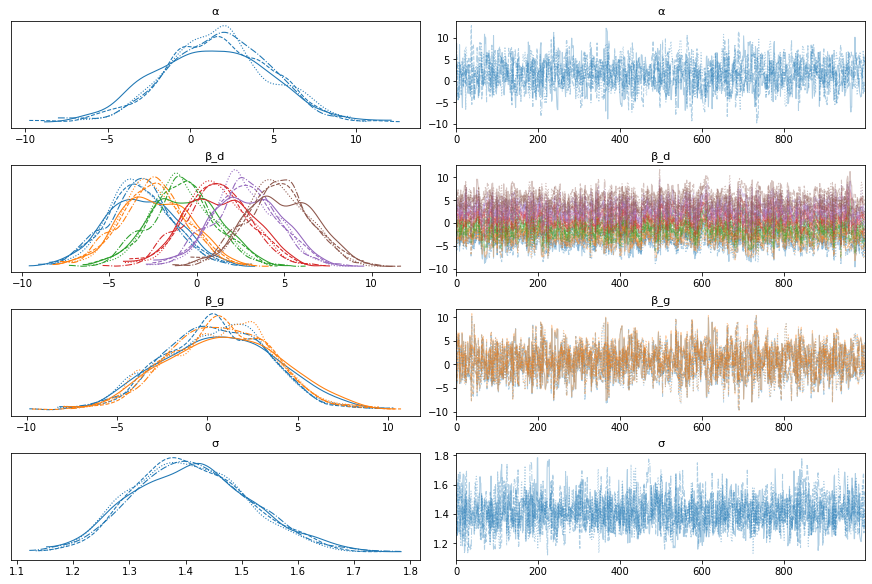

In [117]:
az.plot_trace(az.from_numpyro(mcmc));

## 11H6

In [43]:
import pandas as pd
df = pd.read_csv('primates301.csv', sep=';')
df['log_brain'] = np.log(df['brain'])
df['log_research_effort'] = np.log(df['research_effort'])
df = df[~df['brain'].isna()]
df = df[~df['social_learning'].isna()]
df = df[~df['research_effort'].isna()]
df

,name,genus,species,subspecies,spp_id,genus_id,social_learning,research_effort,brain,body,group_size,gestation,weaning,longevity,sex_maturity,maternal_investment,log_brain,log_research_effort
0,Allenopithecus_nigroviridis,Allenopithecus,nigroviridis,NaN,1,1,0.0,6.0,58.02,4655.0,40.00,NaN,106.15,276.0,NaN,NaN,4.060788,1.791759
2,Alouatta_belzebul,Alouatta,belzebul,NaN,3,3,0.0,15.0,52.84,6395.0,7.40,NaN,NaN,NaN,NaN,NaN,3.967268,2.708050
3,Alouatta_caraya,Alouatta,caraya,NaN,4,3,0.0,45.0,52.63,5383.0,8.90,185.92,323.16,243.6,1276.72,509.08,3.963286,3.806662
4,Alouatta_guariba,Alouatta,guariba,NaN,5,3,0.0,37.0,51.70,5175.0,7.40,NaN,NaN,NaN,NaN,NaN,3.945458,3.610918
5,Alouatta_palliata,Alouatta,palliata,NaN,6,3,3.0,79.0,49.88,6250.0,13.10,185.42,495.60,300.0,1578.42,681.02,3.909620,4.369448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Trachypithecus_obscurus,Trachypithecus,obscurus,NaN,295,67,0.0,6.0,62.12,7056.0,10.00,146.63,362.93,300.0,NaN,509.56,4.129068,1.791759
295,Trachypithecus_phayrei,Trachypithecus,phayrei,NaN,296,67,0.0,16.0,72.84,7475.0,12.90,180.61,305.87,NaN,NaN,486.48,4.288265,2.772589
296,Trachypithecus_pileatus,Trachypithecus,pileatus,NaN,297,67,0.0,5.0,103.64,11794.0,8.50,NaN,NaN,NaN,NaN,NaN,4.640923,1.609438
298,Trachypithecus_vetulus,Trachypithecus,vetulus,NaN,299,67,0.0,2.0,61.29,6237.0,8.35,204.72,245.78,276.0,1113.70,450.50,4.115617,0.693147


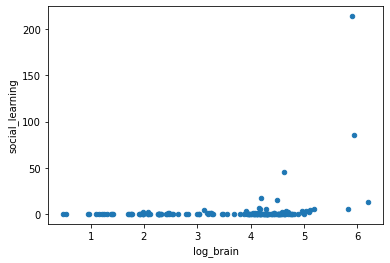

In [3]:
df.plot.scatter(x='log_brain', y='social_learning');

In [36]:
def model(log_brain, social_learning):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(0, 4),
    )
    β = numpyro.sample(
        'β',
        numpyro.distributions.Normal(0, .1),
    )
    
    λ = jnp.exp(α + β*log_brain)
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Poisson(rate=λ),
        obs=social_learning,
    )

In [37]:
prior_pred = numpyro.infer.Predictive(model, num_samples=100)
prior_samples = prior_pred(
    jax.random.PRNGKey(0),
    log_brain=df['log_brain'].to_numpy(),
    social_learning=None,
)

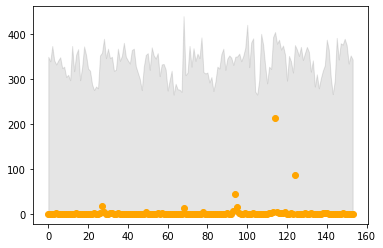

In [38]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['social_learning'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(prior_samples['obs']), color='black', alpha=.1);

In [39]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000, num_chains=4)
mcmc.run(
    jax.random.PRNGKey(0),
    log_brain=df['log_brain'].to_numpy(),
    social_learning=df['social_learning'].to_numpy(),
)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [40]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         α     -6.47      0.24     -6.47     -6.87     -6.08    666.71      1.00
         β      1.70      0.05      1.71      1.63      1.78    671.97      1.00

Number of divergences: 0


In [41]:
post_pred = numpyro.infer.Predictive(model, posterior_samples=mcmc.get_samples())
predictions = post_pred(
    jax.random.PRNGKey(0),
    log_brain=df['log_brain'].to_numpy(),
    social_learning=None,
)

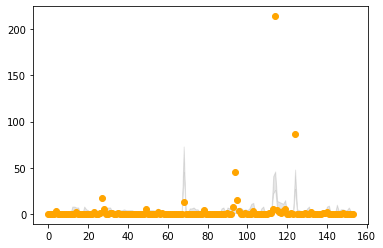

In [42]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['social_learning'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(predictions['obs']), color='black', alpha=.1);

In [44]:
def model(log_brain, social_learning, log_research):
    α = numpyro.sample(
        'α',
        numpyro.distributions.Normal(0, 4),
    )
    β_brain = numpyro.sample(
        'β_brain',
        numpyro.distributions.Normal(0, .1),
    )
    β_research = numpyro.sample(
        'β_research',
        numpyro.distributions.Normal(0, .1),
    )
    
    λ = jnp.exp(α + β_brain*log_brain+ β_research*log_research)
    
    numpyro.sample(
        'obs',
        numpyro.distributions.Poisson(rate=λ),
        obs=social_learning,
    )

In [46]:
prior_pred = numpyro.infer.Predictive(model, num_samples=100)
prior_samples = prior_pred(
    jax.random.PRNGKey(0),
    log_brain=df['log_brain'].to_numpy(),
    log_research=df['log_research_effort'].to_numpy(),
    social_learning=None,
)

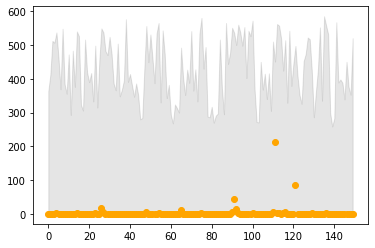

In [47]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['social_learning'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(prior_samples['obs']), color='black', alpha=.1);

In [48]:
sampler = numpyro.infer.NUTS(model)
mcmc = numpyro.infer.MCMC(sampler, num_samples=1000, num_warmup=1000, num_chains=4)
mcmc.run(
    jax.random.PRNGKey(0),
    log_brain=df['log_brain'].to_numpy(),
    social_learning=df['social_learning'].to_numpy(),
    log_research=df['log_research_effort'].to_numpy(),
)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [49]:
mcmc.print_summary()


                  mean       std    median      5.0%     95.0%     n_eff     r_hat
           α     -6.49      0.25     -6.48     -6.87     -6.06   1422.38      1.00
     β_brain      0.48      0.05      0.48      0.40      0.57   1591.54      1.00
  β_research      1.28      0.05      1.28      1.20      1.36   1334.70      1.00

Number of divergences: 0


In [50]:
post_pred = numpyro.infer.Predictive(model, posterior_samples=mcmc.get_samples())
predictions = post_pred(
    jax.random.PRNGKey(0),
    log_brain=df['log_brain'].to_numpy(),
    log_research=df['log_research_effort'].to_numpy(),
    social_learning=None,
)

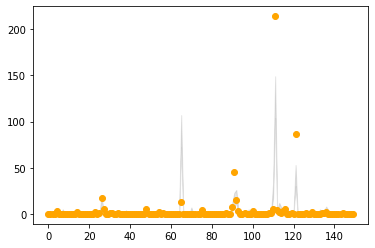

In [51]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(df)), df['social_learning'], 'o', color='orange');
ax.fill_between(np.arange(len(df)), *numpyro.diagnostics.hpdi(predictions['obs']), color='black', alpha=.1);

In [53]:
# Poisson(lambda)
# log(lambda) ~ a + bx

# so, if x increase by one, then log lambda increases by b. 
# log(new)-log(old) = b
# log(new/old) = b
# new/old = exp(b)

# OK, so if log research effort increases by one unit, then social learning increases
# by a factor of
np.exp(mcmc.get_samples()['β_research'].mean())

3.5972738

In [54]:
# surely, research effort can't affect brain size. but, brain size can affect research effort. yeah, surely.
# so:
# brain -> research
#   \         |
#      learning

# so...ummm...no, wait, research can't possibly effect learning, can it? oh, yeah, it can - the more studied, the more learning is observed.
# this would make sense, because once we include research, then the effect of brain is much reduced